In [ ]:
#Importing the libraries
import tweepy                                                                   #An easy-to-use Python library for accessing the Twitter API.
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re                                                                       #regular
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)                      #to show full text in the columns instead of ...  
from googletrans import Translator
translator = Translator()

import re

https://www.programiz.com/python-programming/regex#:~:text=Python%20has%20a%20module%20named,(%22Search%20unsuccessful.%22)


for getting the access token and access token secret
https://developer.twitter.com/en/portal/dashboard


TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
#Get the data
log = pd.read_csv('Login.csv')

In [ ]:
display(log)

,key
0,wObnRcKaS7YNARkzcJTXgIcQl
1,gDhfIf3oNpqvUDKqdstF4v60B3cQ7tba0fu57zwFS0B39Qobn8
2,1529885404023103488-WXFx7Pm0adNlwVgq37zLrCXKNNOhgA
3,sgoEPqYMOWp1FkzOJdu6PJa4BPUY5kTUPiqWhUViFpw5N


In [ ]:
#Twitter API credentials
consumerKey= log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret= log['key'][3]

In [ ]:
print(consumerKey)

wObnRcKaS7YNARkzcJTXgIcQl


oauth - as a way for internet users to grant websites or applications access to their information on other websites but without giving them the passwords.
https://www.geeksforgeeks.org/what-is-oauth-open-authorization/

diff between api key and access key
The main distinction between these two is: API keys identify the calling project — the application or site — making the call to an API. Authentication tokens identify a user — the person — that is using the app or site.

 An application programming interface (API) key is a code used to identify and authenticate an application or user.

Rate limiting is used to control the amount of incoming and outgoing traffic to or from a network. For example, let's say you are using a particular service's API that is configured to allow 100 requests/minute. If the number of requests you make exceeds that limit, then an error will be triggered.

wait_on_rate_limit – Whether or not to automatically wait for rate limits to replenish

**Object API**s main purpose is to provide basic information about one or all clients objects.

In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while parsing the auth information

api = tweepy.API(authenticate, wait_on_rate_limit= True)

The user_timeline() method of the API class in Tweepy module is used to get the 20 most recent statuses posted from the authenticating user or the user specified.
count = the default value is 20
https://www.geeksforgeeks.org/python-api-user_timeline-in-tweepy/

We are using extended (extended) mode for tweeter mode as it gives us the full text
another one is compatibility (compat) which truncates all values after 140 characters.
https://docs.tweepy.org/en/stable/extended_tweets.html


A new 'extended_tweet' field was introduced to hold the longer Tweet messages and complete entity metadata. The "extended_tweet" object provides the "full_text" field that contains the complete, untruncated Tweet message when longer than 140 characters. The "extended_tweet" object also contains an "entities" object with complete arrays of hashtags, links, mentions, etc.

In [ ]:
#Extract 100 tweets from the twitter user
post= api.user_timeline(screen_name="bts_bighit", count=1000, lang="en", tweet_mode="extended")

# post.size()
#Print the last 5 tweets from the account
# print("show the last 5 recent tweets")
# i=1
# for tweet in post[0:5]:
#   print(str(i)+ ') '+ tweet.full_text+'\n')
#   i=i+1

# # agr yaha pr upr count 20 krte aur post[0:100] krte toh ye 20 k baad rok deta
# # for tweet in post[0:5]:
# #  print(tweet)
# #  print('\n')                                    
# print(len(post))
sub_list = ["Translated(src=en, dest=en, text="]
count=300
i=1
for sub in sub_list:
  for tweet in post[0:count]:
    # print(tweet.full_text)
    # print()
    # print(i)
    # print(' ')
    tweet.full_text= translator.translate(tweet.full_text)
    type(tweet.full_text)
    # tweet.full_text= tweet.full_text.replace(sub, ' ')
    # print(tweet.full_text)
    i=i+1
    print()

# *** it shows both tweets and replies ***




# text="BTS (방탄소년단) 'Proof' Concept Photo Short Clip #BTS #방탄소년단 #BTS_Proof https://t.co/yWqMz8ZFc5"
# text =  translator.translate(text)
# print(text)
# text= re.sub(r'Translated(src=ko, dest=en, text=','', text)
# print(text)

In [ ]:
# Create a dataframe with column called tweets
df = pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])

# show first 5 tweets


# df.index
# df.index+=1                 # to start indexing from 1 instead of 0
# df.head()
df

,Tweets
0,"Translated(src=ko, dest=en, text=BTS (BTS) 'Proof' Concept Photo Short Clip\n\n#BTS #BTS #BTS_Proof https://t.co/yWqMz8ZFc5, pronunciation=[[]], extra_data=""{'translat..."")"
1,"Translated(src=ko, dest=en, text=[#2022BTSFESTA]\n🕗604\nPRACTICE RECORD ’16\n\nBTS (BTS) ‘Am I Wrong’\n(https://t.co/Ez9LroKyYT)\n\n#2022BTSFESTA\n#BTS9thAnniversary\n#practiceroom boys #2016 practice log\n#AmIWrong #Welcome to the practice room, this is my first time doing AmIWrong\n#Cute Curry Hamg Japchae #Look forward to tomorrow 9, pronunciation=[[]], extra_data=""{'translat..."")"
2,"Translated(src=ko, dest=en, text=[#2022BTSFESTA]\n🕖604\nPRACTICE RECORD ’15\n\nBTS (BTS) ‘Butterfly’\n(https://t.co/uRBFRYqEKZ)\n\n#2022BTSFESTA\n#BTS9thAnniversary\n#practiceroom boys #2015 practice log\n#Butterfly #Beautiful dance line is coming\n#Every moment was Hwa Yang Yeon Hwa, pronunciation=[[]], extra_data=""{'translat..."")"
3,"Translated(src=ko, dest=en, text=[#2022BTSFESTA]\n🕕604\nPRACTICE RECORD ’14\n\nBTS (BTS) ‘Danger’\n(https://t.co/GPL4rcmDmf)\n\n#2022BTSFESTA\n#BTS9thAnniversary\n#Practice room boys #2014 practice log\n#Danger #Baby Dancer is Hear\n#Dancer practice that makes life dance, pronunciation=[[]], extra_data=""{'translat..."")"
4,"Translated(src=ko, dest=en, text=[#2022BTSFESTA]\n🕖603\nPRACTICE RECORD '13\nBTS (BTS) 'N.O'\n(https://t.co/fPHtEnTbX0)\n#2022BTSFESTA\n#BTS9thAnniversary\n#Rehearsal Boys #2013 Practice Journal\n#NO #Intense No.O eyes\n#But, ARMYs, can I come again tomorrow?, pronunciation=[[]], extra_data=""{'translat..."")"
...,...
195,"Translated(src=ko, dest=en, text=[Announcement] #BTS PERMISSION TO DANCE ON STAGE - SEOUL Performance Announcement (+ENG/JPN/CHN)\nhttps://t.co/FE6TVOYvgc\n\n#PTD_ON_STAGE_SEOUL #PermissiontoDance #BTS, pronunciation=[[]], extra_data=""{'translat..."")"
196,"Translated(src=ko, dest=en, text=[Episode] Behind the scenes of #BTS #BTS 2021 iHeartRadio Jingle Ball!\n(https://t.co/4HagP1ugu6), pronunciation=[[]], extra_data=""{'translat..."")"
197,"Translated(src=en, dest=en, text=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for #7FATES_CHAKHO right here on @Spotify's #TeenBeats playlist.\n\n🎧 https://t.co/d2e4VlcuZ5\n\n#방탄소년단 #BTS #슈가 #SUGA #정국 #JungKook #StayAlive_CHAKHO https://t.co/CL0wZ0l4Q4, pronunciation=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for #7FATES_CHAKHO right here on @Spotify's #TeenBeats playlist.\n\n🎧 https://t.co/d2e4VlcuZ5\n\n#방탄소년단 #BTS #슈가 #SUGA #정국 #JungKook #StayAlive_CHAKHO https://t.co/CL0wZ0l4Q4, extra_data=""{'translat..."")"
198,"Translated(src=ko, dest=en, text=RT @BIGHIT_MUSIC: Stay Alive (Prod. SUGA of BTS) Release\n#BTS #BTS #SUGA #SUGA #Jungkook #JungKook\n#StayAlive_CHAKHO #7FATES_CHAKHO\n\n▶ Global: h…, pronunciation=[[]], extra_data=""{'translat..."")"


In [ ]:
# use of plus
text= "I am @ARchika shukla"

text1= re.sub(r'@[A-Za-z0-9]','',text)
text2=re.sub(r'@[A-Za-z0-9]+','',text)
print(text1)
print(text2)

I am Rchika shukla
I am  shukla


In [ ]:
# tweets followed by one or more whitespaces
# \n \t \s 
# https:\/\/


# textt= "the link for this is Feels ♥️\n@RCBTweets @faf1307 @Gmaxi_32 https://t.co/cmdIU81c2I for the "
tex= "Feels ♥️\n@RCBTweets @faf1307 @Gmaxi_32 https://t.co/cmdIU81c2I"

tex=re.sub(r'https?:\/\/\S+', '', tex)
# tex = re.sub(r'http\S+', '', tex)


print(tex)

Feels ♥️
@RCBTweets @faf1307 @Gmaxi_32 


df['column']=df['column'].apply(function)
for applying user defined function on dataframe

df['position'] = df['salary'].apply(f)
no need to write the argument while writing apply(f)

In [ ]:
#Clean the text


#Create a function to clean the text

def cleanText(text):
  text= re.sub(r'@[A-z a-z 0-9]+', '',text)   #Removed @mentions
  text= re.sub(r'#', '',text)   #Removed the '#' sybmbol
  text= re.sub(r'RT[\s]', '',text)   #Removed RT
  text= re.sub(r'https?:\/\/\S+','', text)
  return text

df['Tweets']=df['Tweets'].apply(cleanText)


#Show the cleaned text
df

TypeError: ignored

In [ ]:
# Clean the tweet

# Create a function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Z a-z 0-9]+', '', text)
  text = re.sub(r'#+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  return text

# cleaning the text
df['Tweets'] = df['Tweets'].apply(str)
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets

df

,Tweets,Subjectivity,Polarity
0,"Translated(src=ko, dest=en, text=BTS (BTS) 'Proof' Concept Photo Short Clip\n\nBTS BTS BTS_Proof pronunciation=[[]], extra_data=""{'translat..."")",0.300000,0.000000
1,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕗604\nPRACTICE RECORD ’16\n\nBTS (BTS) ‘Am I Wrong’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2016 practice log\nAmIWrong Welcome to the practice room, this is my first time doing AmIWrong\nCute Curry Hamg Japchae Look forward to tomorrow 9, pronunciation=[[]], extra_data=""{'translat..."")",0.783333,0.262500
2,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖604\nPRACTICE RECORD ’15\n\nBTS (BTS) ‘Butterfly’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2015 practice log\nButterfly Beautiful dance line is coming\nEvery moment was Hwa Yang Yeon Hwa, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,0.850000
3,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕕604\nPRACTICE RECORD ’14\n\nBTS (BTS) ‘Danger’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\nPractice room boys 2014 practice log\nDanger Baby Dancer is Hear\nDancer practice that makes life dance, pronunciation=[[]], extra_data=""{'translat..."")",0.000000,0.000000
4,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖603\nPRACTICE RECORD '13\nBTS (BTS) 'N.O'\n(\n2022BTSFESTA\nBTS9thAnniversary\nRehearsal Boys 2013 Practice Journal\nNO Intense No.O eyes\nBut, ARMYs, can I come again tomorrow?, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,-0.100000
...,...,...,...
195,"Translated(src=ko, dest=en, text=[Announcement] BTS PERMISSION TO DANCE ON STAGE - SEOUL Performance Announcement (+ENG/JPN/CHN)\n\n\nPTD_ON_STAGE_SEOUL PermissiontoDance BTS, pronunciation=[[]], extra_data=""{'translat..."")",0.000000,0.000000
196,"Translated(src=ko, dest=en, text=[Episode] Behind the scenes of BTS BTS 2021 iHeartRadio Jingle Ball!\n( pronunciation=[[]], extra_data=""{'translat..."")",0.700000,-0.500000
197,"Translated(src=en, dest=en, text=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for 7FATES_CHAKHO right here on 's TeenBeats playlist.\n\n🎧 \n\n방탄소년단 BTS 슈가 SUGA 정국 JungKook StayAlive_CHAKHO pronunciation=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for 7FATES_CHAKHO right here on 's TeenBeats playlist.\n\n🎧 \n\n방탄소년단 BTS 슈가 SUGA 정국 JungKook StayAlive_CHAKHO extra_data=""{'translat..."")",0.561905,0.253571
198,"Translated(src=ko, dest=en, text=_MUSIC: Stay Alive (Prod. SUGA of BTS) Release\nBTS BTS SUGA SUGA Jungkook JungKook\nStayAlive_CHAKHO 7FATES_CHAKHO\n\n▶ Global: h…, pronunciation=[[]], extra_data=""{'translat..."")",0.200000,0.050000


Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.  how subjected or optiniated a text is

Polarity tells how positive aur negative the text is



In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):

  return TextBlob(text).sentiment.subjectivity

#Create a function to get the subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
#Create two new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the new datafram with the new column
df.head()
# df.shape()

,Tweets,Subjectivity,Polarity
0,"Translated(src=ko, dest=en, text=BTS (BTS) 'Proof' Concept Photo Short Clip\n\nBTS BTS BTS_Proof pronunciation=[[]], extra_data=""{'translat..."")",0.300000,0.0000
1,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕗604\nPRACTICE RECORD ’16\n\nBTS (BTS) ‘Am I Wrong’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2016 practice log\nAmIWrong Welcome to the practice room, this is my first time doing AmIWrong\nCute Curry Hamg Japchae Look forward to tomorrow 9, pronunciation=[[]], extra_data=""{'translat..."")",0.783333,0.2625
2,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖604\nPRACTICE RECORD ’15\n\nBTS (BTS) ‘Butterfly’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2015 practice log\nButterfly Beautiful dance line is coming\nEvery moment was Hwa Yang Yeon Hwa, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,0.8500
3,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕕604\nPRACTICE RECORD ’14\n\nBTS (BTS) ‘Danger’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\nPractice room boys 2014 practice log\nDanger Baby Dancer is Hear\nDancer practice that makes life dance, pronunciation=[[]], extra_data=""{'translat..."")",0.000000,0.0000
4,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖603\nPRACTICE RECORD '13\nBTS (BTS) 'N.O'\n(\n2022BTSFESTA\nBTS9thAnniversary\nRehearsal Boys 2013 Practice Journal\nNO Intense No.O eyes\nBut, ARMYs, can I come again tomorrow?, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,-0.1000


he join() method takes all items in an iterable and joins them into one string.

A string must be specified as the separator.

string.join (iterable)
x = "#".join(myTuple)


Python Imaging Library(PIL) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.

random_state:  It will return PIL color for each word, set as an int value. 

plt.imshow
Display data as an image, i.e., on a 2D regular raster.
Raster (or bitmap) images are generally what you think about when thinking of images. These are the types of images that are produced when scanning or photographing an object. Raster images are compiled using pixels, or tiny dots, containing unique color and tonal information that come together to create the image


This is to make the displayed image appear more smoothly. 

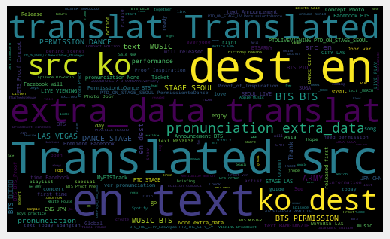

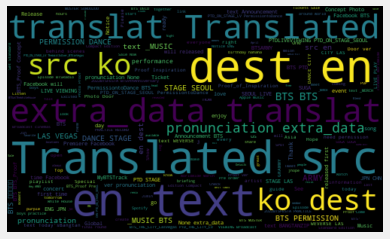

In [ ]:
allWords= ' '.join([twt for twt in df['Tweets']])
wordcloud= WordCloud(width =500 , height =300, random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordcloud,interpolation='none')
plt.axis("off")
plt.show()
plt.imshow(wordcloud,interpolation='bilinear')        #is a little bit blur
plt.axis("off")
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if(score>0):
    return 'Positive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Negative'

#Show the dataframe
df['Analysis']=df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,"Translated(src=ko, dest=en, text=BTS (BTS) 'Proof' Concept Photo Short Clip\n\nBTS BTS BTS_Proof pronunciation=[[]], extra_data=""{'translat..."")",0.300000,0.000000,Neutral
1,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕗604\nPRACTICE RECORD ’16\n\nBTS (BTS) ‘Am I Wrong’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2016 practice log\nAmIWrong Welcome to the practice room, this is my first time doing AmIWrong\nCute Curry Hamg Japchae Look forward to tomorrow 9, pronunciation=[[]], extra_data=""{'translat..."")",0.783333,0.262500,Positive
2,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖604\nPRACTICE RECORD ’15\n\nBTS (BTS) ‘Butterfly’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\npracticeroom boys 2015 practice log\nButterfly Beautiful dance line is coming\nEvery moment was Hwa Yang Yeon Hwa, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,0.850000,Positive
3,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕕604\nPRACTICE RECORD ’14\n\nBTS (BTS) ‘Danger’\n(\n\n2022BTSFESTA\nBTS9thAnniversary\nPractice room boys 2014 practice log\nDanger Baby Dancer is Hear\nDancer practice that makes life dance, pronunciation=[[]], extra_data=""{'translat..."")",0.000000,0.000000,Neutral
4,"Translated(src=ko, dest=en, text=[2022BTSFESTA]\n🕖603\nPRACTICE RECORD '13\nBTS (BTS) 'N.O'\n(\n2022BTSFESTA\nBTS9thAnniversary\nRehearsal Boys 2013 Practice Journal\nNO Intense No.O eyes\nBut, ARMYs, can I come again tomorrow?, pronunciation=[[]], extra_data=""{'translat..."")",1.000000,-0.100000,Negative
...,...,...,...,...
195,"Translated(src=ko, dest=en, text=[Announcement] BTS PERMISSION TO DANCE ON STAGE - SEOUL Performance Announcement (+ENG/JPN/CHN)\n\n\nPTD_ON_STAGE_SEOUL PermissiontoDance BTS, pronunciation=[[]], extra_data=""{'translat..."")",0.000000,0.000000,Neutral
196,"Translated(src=ko, dest=en, text=[Episode] Behind the scenes of BTS BTS 2021 iHeartRadio Jingle Ball!\n( pronunciation=[[]], extra_data=""{'translat..."")",0.700000,-0.500000,Negative
197,"Translated(src=en, dest=en, text=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for 7FATES_CHAKHO right here on 's TeenBeats playlist.\n\n🎧 \n\n방탄소년단 BTS 슈가 SUGA 정국 JungKook StayAlive_CHAKHO pronunciation=Listen to Jung Kook's original soundtrack ""Stay Alive (Prod. SUGA of BTS)"" for 7FATES_CHAKHO right here on 's TeenBeats playlist.\n\n🎧 \n\n방탄소년단 BTS 슈가 SUGA 정국 JungKook StayAlive_CHAKHO extra_data=""{'translat..."")",0.561905,0.253571,Positive
198,"Translated(src=ko, dest=en, text=_MUSIC: Stay Alive (Prod. SUGA of BTS) Release\nBTS BTS SUGA SUGA Jungkook JungKook\nStayAlive_CHAKHO 7FATES_CHAKHO\n\n▶ Global: h…, pronunciation=[[]], extra_data=""{'translat..."")",0.200000,0.050000,Positive


In [ ]:
sortedDF= df.sort_values(by=['Polarity'])
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
158,"Translated(src=ko, dest=en, text=_MUSIC: [Weverse Magazine] BTS PTD_ON_STAGE_SEOUL GUIDE\n\nThings to know before going to a concert\nThings to know before attending the concert\n\n▶️ENG: https:…, pronunciation=[[]], extra_data=""{'translat..."")",1.0,-0.750,Negative
87,"Translated(src=ko, dest=en, text=_MUSIC: [Weverse Magazine] BTS penetrated the Grammys\n\nBTS infiltrates the Grammys. An inside look at the rehearsal for BTS’s Grammy performance…, pronunciation=[[]], extra_data=""{'translat..."")",1.0,-0.750,Negative
138,"Translated(src=ko, dest=en, text=_MUSIC: [Weverse Magazine] The scenery V draws with music\nHow music records the traces of youth\n\nV paints a picture through his music\nThe BTS member’s music traces th…, pronunciation=[[]], extra_data=""{'translat..."")",1.0,-0.750,Negative
40,"Translated(src=ko, dest=en, text=[Episode] BTS BTS 'My Universe' music video behind the scenes revealed!\n( pronunciation=[[]], extra_data=""{'translat..."")",0.7,-0.500,Negative
196,"Translated(src=ko, dest=en, text=[Episode] Behind the scenes of BTS BTS 2021 iHeartRadio Jingle Ball!\n( pronunciation=[[]], extra_data=""{'translat..."")",0.7,-0.500,Negative
...,...,...,...,...
11,"Translated(src=en, dest=en, text=: “Everyone has their own history. We hope today is one step forward to respecting and understanding each and every one as a…, pronunciation=: “Everyone has their own history. We hope today is one step forward to respecting and understanding each and every one as a…, extra_data=""{'translat..."")",1.0,0.600,Positive
157,"Translated(src=ko, dest=en, text=[Suga's birthday hahaha]\n0309\nHAPPY\nBIRTHDAY\nSUGA\nShow us the cutest moments of your beloved pet! ฅ^ﻌ•^ฅ\nSUGA Min Yoongi Yunggi Jungki Will You Me, Me SUGA_BDAY\n💜🐱🍰🎂🏀🎸🎹💜 pronunciation=[[]], extra_data=""{'translat..."")",0.8,0.625,Positive
128,"Translated(src=en, dest=en, text=_MERCH: BTS POP-UP : PERMISSION TO DANCE in LAS VEGAS \nWelcome to an immersive journey through the band's history, music videos hi…, pronunciation=_MERCH: BTS POP-UP : PERMISSION TO DANCE in LAS VEGAS \nWelcome to an immersive journey through the band's history, music videos hi…, extra_data=""{'translat..."")",0.9,0.800,Positive
126,"Translated(src=en, dest=en, text=BTS (방탄소년단) PERMISSION TO DANCE ON STAGE - LAS VEGAS Welcome Message\n(\n\nPTD_ON_STAGE_LV PermissiontoDance, pronunciation=BTS (방탄소년단) PERMISSION TO DANCE ON STAGE - LAS VEGAS Welcome Message\n(\n\nPTD_ON_STAGE_LV PermissiontoDance, extra_data=""{'translat..."")",0.9,0.800,Positive


In [ ]:
 #Print all of the positive tweets
j=1

for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(sortedDF['Polarity'][i])
    print()
    print(str(j)+ ')'+sortedDF['Tweets'][i])
    print()
    j=j+1

0.2625

1)Translated(src=ko, dest=en, text=[2022BTSFESTA]
🕗604
PRACTICE RECORD ’16

BTS (BTS) ‘Am I Wrong’
(

2022BTSFESTA
BTS9thAnniversary
practiceroom boys 2016 practice log
AmIWrong Welcome to the practice room, this is my first time doing AmIWrong
Cute Curry Hamg Japchae Look forward to tomorrow 9, pronunciation=[[]], extra_data="{'translat...")

0.85

2)Translated(src=ko, dest=en, text=[2022BTSFESTA]
🕖604
PRACTICE RECORD ’15

BTS (BTS) ‘Butterfly’
(

2022BTSFESTA
BTS9thAnniversary
practiceroom boys 2015 practice log
Butterfly Beautiful dance line is coming
Every moment was Hwa Yang Yeon Hwa, pronunciation=[[]], extra_data="{'translat...")

0.04999999999999999

3)Translated(src=ko, dest=en, text=[2022BTSFESTA]
🕕603
PRACTICE RECORD ’13
BTS (BTS) ‘We are bulletproof PT.2’ + ‘No More Dream’
(
2022BTSFESTA
BTS9thAnniversary
Rehearsal Boys 2013 Practice Journal
Wearbulletproof_PT2
NoMoreDream
full of spirit debut boys tear up the practice room, pronunciation=[[]], extra_data="{'transla

In [ ]:
# new_df=sortedDF[['Tweets','Polarity']]
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(sortedDF['Polarity'][i])
# new_df

0.2625
0.85
0.04999999999999999
0.1
0.5
0.6
0.25000000000000006
0.392
0.06666666666666665
0.04999999999999999
0.0909090909090909
0.12878787878787878
0.35642857142857143
0.3125
0.5
0.36904761904761907
0.1645021645021645
0.25
0.5416666666666666
0.008125000000000004
0.14187500000000003
0.052343749999999994
0.09523809523809523
0.5
0.018181818181818174
0.05000000000000001
0.2638888888888889
0.2719494047619047
0.125
0.2
0.3151515151515152
0.125
0.2857142857142857
0.13636363636363635
0.375
0.4708333333333334
0.23125
0.2931818181818182
0.3035714285714286
0.4
0.125
0.525
0.3666666666666667
0.19970238095238094
0.390625
0.45416666666666666
0.52734375
0.06818181818181818
0.06818181818181818
0.5625
0.19176136363636362
0.55
0.1958806818181818
0.8
0.8
0.10000000000000002
0.13636363636363635
0.421875
0.125
0.30000000000000004
0.44999999999999996
0.08333333333333333
0.4166666666666667
0.125
0.30000000000000004
0.2090909090909091
0.4
0.2
0.29000000000000004
1.1102230246251566e-17
0.625
0.136363636363636

In [ ]:

pos_val=0
neg_val=0
neu_val=0

for i in range(0,df.shape[0]):
  if(df['Analysis'][i]=='Positive'):
    pos_val+=1
  elif(df['Analysis'][i]=='Neutral'):
    neu_val+=1
  else:
    neg_val+=1
print(pos_val,neg_val,neu_val)

93 21 86


In [ ]:
#Print all of the negaitve tweets
j=1
sortedDF= df.sort_values(by=['Polarity'],ascending= 'False')
# for i in range(0, sortedDF.shape[0]):
#   if(sortedDF['Analysis'][i]=='Negative'):
#     print(sortedDF['Polarity'][i])
#     print()
#     print(str(j)+ ')'+sortedDF['Tweets'][i])
#     print()
#     j=j+1
print(type(sortedDF['Polarity']))
print(sortedDF.dtypes)

<class 'pandas.core.series.Series'>
Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object


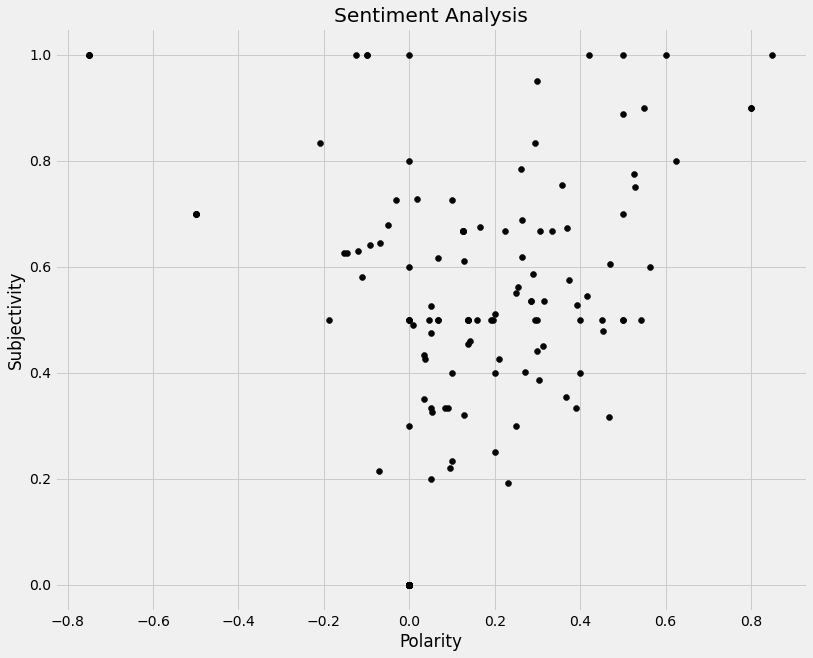

In [ ]:
#Plot the polarity and subjectivity

plt.figure(figsize=(12,10))
# colors = np.random.rand(200)
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='black',alpha=0.98)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
ptweets

# print(ptweets.shape[0])
# print(df.shape[0])
round(  (ptweets.shape[0]/df.shape[0]) *100 , 1)
# (ptweets.shape[0]/df.shape[0])*100

46.5

In [ ]:
#Get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
ntweets

# print(ntweets.shape[0])
round(  (ntweets.shape[0]/df.shape[0]) *100 , 1)

10.5

In [ ]:
#Get the percentage of neutral tweets
neutweets=df[df.Analysis=='Neutral']
neutweets=neutweets['Tweets']
neutweets

# print(n tweets.shape[0])
round(  (neutweets.shape[0]/df.shape[0]) *100 , 1)

43.0

https://www.youtube.com/watch?v=Y8iNez1tCx8&ab_channel=ASLearning


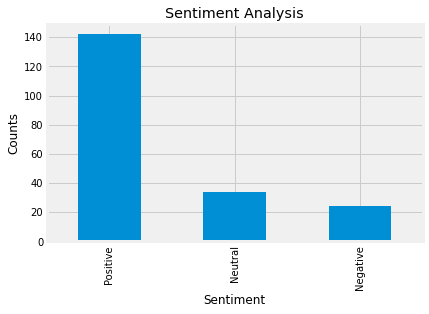

In [ ]:
#Show the value counts

x= df['Analysis'].value_counts()

#plot and visualize the results
plt.title ('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
x.plot(kind='bar')
plt.show()

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 10.4 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=dbc7b5535b61627b1fc2e75bf3f177353d0ed233220167265bb620310b427494
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

translated_text = translator.translate('This is 안녕하세요. in korean')
print(translated_text.text)

translated_text = translator.translate('안녕하세요.', dest='ja')
print(translated_text.text)

translated_text = translator.translate('معذرت')
print(translated_text.text)

This is hello. in korean
こんにちは。
apologies


In [ ]:
translation = translate("공식 트위터입니다", "es")
translation